(ref:lec3:ex3)=
# Exercise 3.3

A vehicle is characterized by the following transfer function, which relates the throttle input  $U(s)$  to the velocity  $Y(s)$,

$$
G(s) = \frac{s+10}{(s+0.1)^2(s+5)}
$$

We need to design a controller that regulates the speed of the vehicle.

1. Start by designing a proportional controller $F(s) = K$. For what values of $K$ is the closed-loop stable? How does the closed-loop performance change when $K$ is changed?
2. Consider now $K=10$. Compute the **gain margin** $g_m$ and the **phase margin** $\varphi_m$.

---

## Solution

### Question 1

Since the order of the closed-loop transfer function $G_c(s) = \frac{F(s) G(s)}{1 + F(s) G(s)}$ is three, we can't easily provide an analytical solution. We therefore inspect the root locus.

In [15]:
% Check if we are running in Octave or MATLAB
if exist('OCTAVE_VERSION', 'builtin')
    pkg load control; warning('off', 'all');
    if isempty(getenv('BINDER_SERVICE_HOST')); t = 'notebook'; else; t = 'plotly'; end
    graphics_toolkit(t);
end

s = tf('s');
G =  1 * (s + 10) / ((s + 1)^2 * (s + 5));

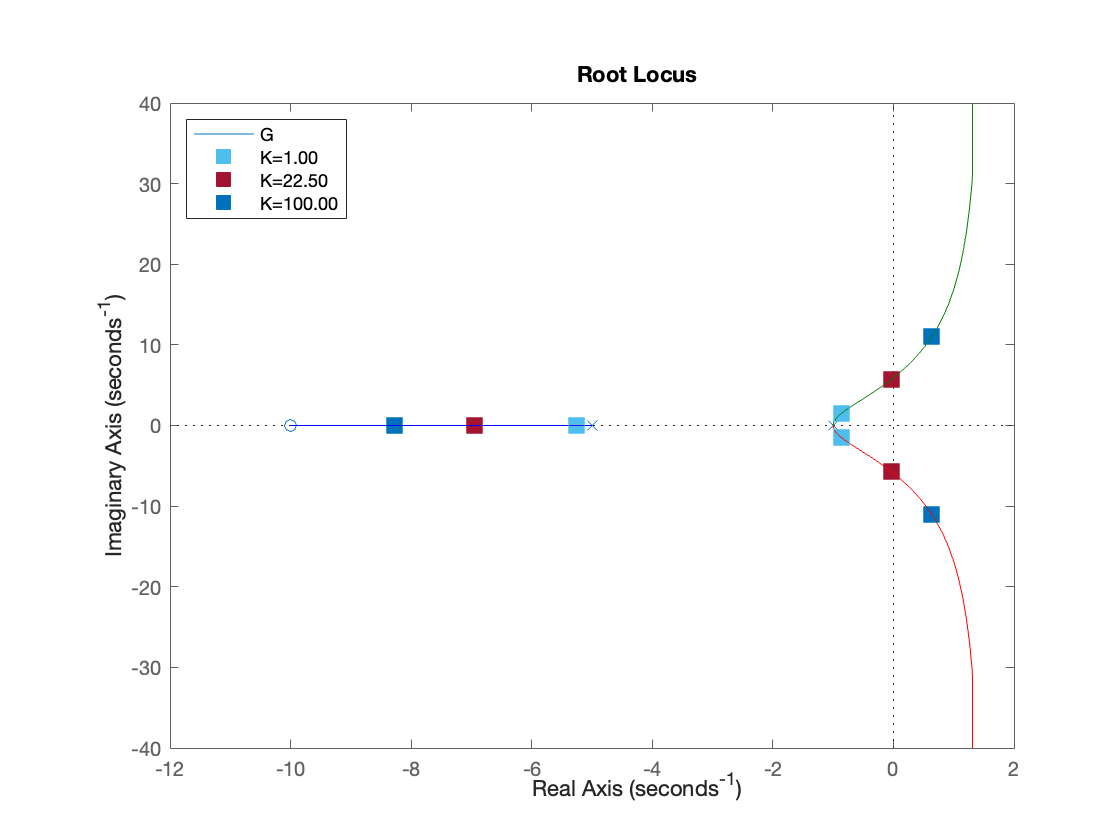

In [20]:
rlocus(G); hold on; % Plot the root locus

% Plot the closed-loop poles for specific values of K
K_points = [1, 22.5, 100];
for k=K_points
    Go = k * G;
    [num, den] = tfdata(Go, "vector");
    poles = roots(num + den);
    p = plot(real(poles), imag(poles), 's', 'MarkerSize', 10, 'MarkerFaceColor', 'auto', 'DisplayName', sprintf('K=%.2f', k));
    set(p, 'markerfacecolor', get(p, 'color'));
end
legend('Location', 'northwest'); hold off;

From the root locus, we can see that the closed-loop poles are stable for $K < 22.5$.

### Question 2

Let's start by computing the **phase margin**, which is defined as

$$
\varphi_m = 180^o + \angle G_o(i \omega_c)
$$

where $G_o(s) = F(s) G(s)$ is the **open-loop transfer function** and $\omega_c$ is the **critical frequency**, that is, the frequency where the open loop transfer function has unitary amplitude, $\lvert G_o(i \omega_c) \lvert = 1$. Remember that $G_o(i \omega)$ is a complex number!

$$
G_o(s) = 10 \frac{s + 10}{(s+0.1)^2(s+5)}
$$

To compute $\omega_c$ we replace $s = i \omega$ for different values of $\omega$, until we find a value where the modulus of $G_o(i \omega)$ is approximately $1$.

In [ ]:
Go_modulus = @(w) abs(10 * (1i * w + 10) / ((1i * w + 1)^2 * (1i * w + 5)));

Go_modulus(1)
Go_modulus(10)
Go_modulus(4)

ans = 9.8547

ans = 0.1252

ans = 0.9894

Therefore $\omega_c \approx 4$ rad/s.

```{note}
You can also find the critical frequency from the Bode diagram, as the interception between the plot of $\lvert G_o(i \omega) \lvert_{\text{dB}}$ and the 0dB axis!
```

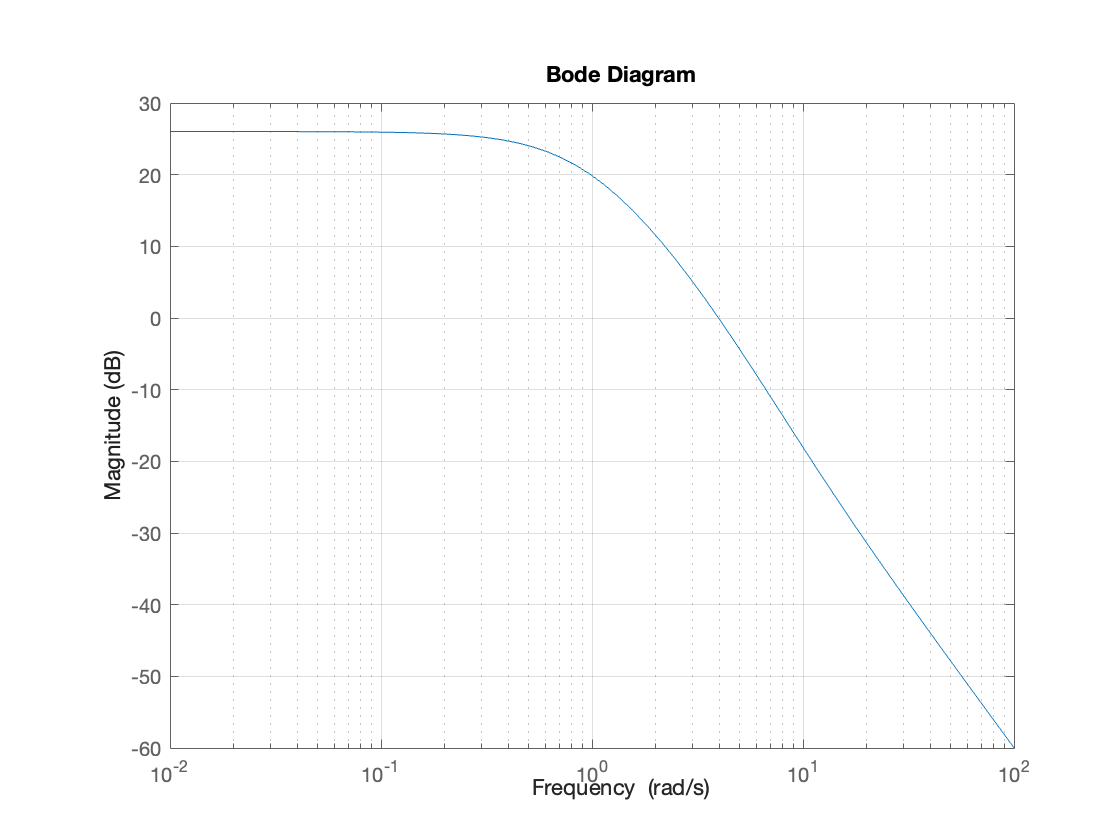

In [28]:
bodemag(10 * G); grid on;

We can now evaluate the phase margin as

$$
\varphi_m = 180 + \angle G_o(i 4)
$$

In [33]:
% We create a function that computes the angle of Go given the frequency omega
Go_angle = @(w) angle(10 * (1i * w + 10) / ((1i * w + 1)^2 * (1i * w + 5)));

phase_margin = 180 + rad2deg(Go_angle(4))   % Conver the angle from radians to degrees

phase_margin = 11.2141

While a phase margin of $11^\circ$ is bigger than $0$, so it is enough to guarantee the closed-loop stability, in practical applications it is too low to be accepted. 

- If $\varphi_m > 90^\circ$, the **dominant closed-loop pole** is real valued and stable.
- If $0 < \varphi_m < 90$, the **dominant closed-loop poles** are complex-conjugate, with damping coefficient $\xi = \cos(\varphi_m)$.
- If $\varphi_m \leq 0$, the system is unstable.

```{warning}
A phase margin below $30^\circ$ indicates that the dominant poles have a low damping coefficient. In general, the phase margin should be at least $45^\circ$ for adequate closed-loop performance.
```

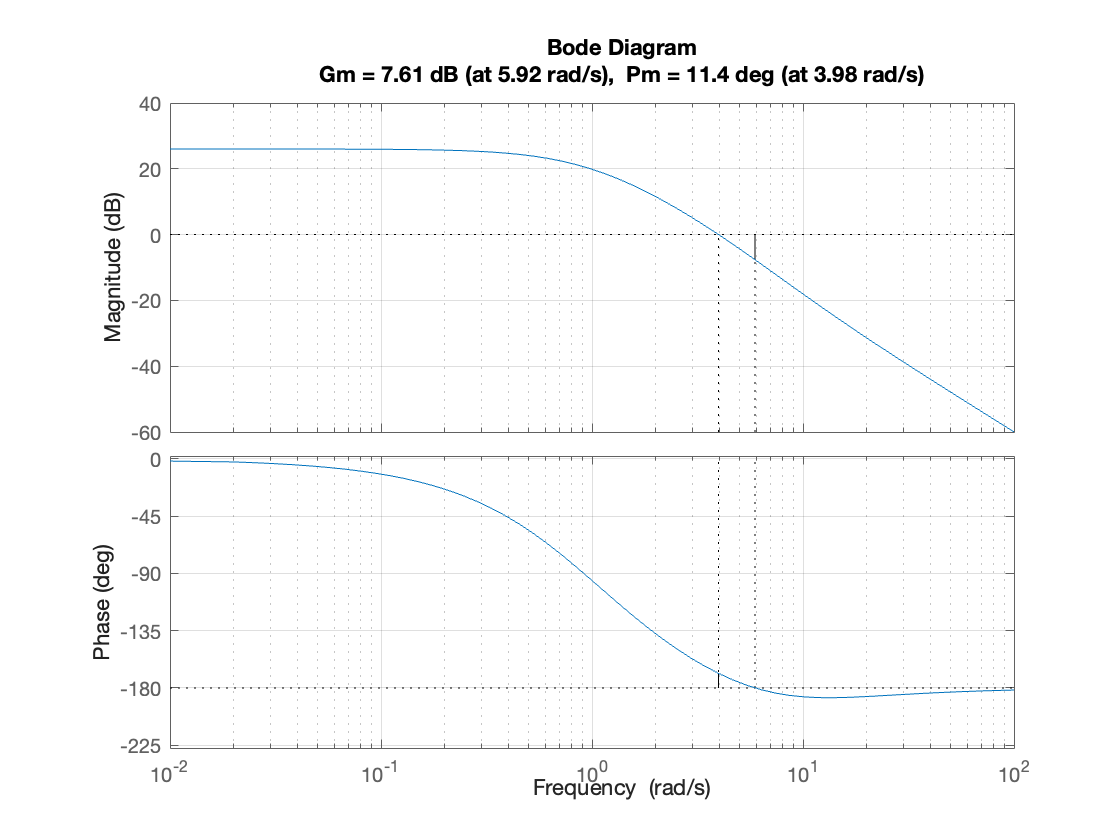

In [26]:
margin(10 * G); grid on;